### Import packages

In [1]:
from bertopic import BERTopic
import os
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
from typing import List
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

OUTPUT_DATA_PATH = join('..','data','output','')
MODEL_PATH = join('..','data','models','Bertopic','')

### Customized function

In [30]:
def visualize_barchart(topic_model,
                       topics: List[int] = None,
                       top_n_topics: int = 8,
                       n_words: int = 5,
                       custom_labels: bool = False,
                       title: str = "Topic Word Scores",
                       width: int = 300,
                       height: int = 300) -> go.Figure:
    """ Visualize a barchart of selected topics
    Arguments:
        topic_model: A fitted BERTopic instance.
        topics: A selection of topics to visualize.
        top_n_topics: Only select the top n most frequent topics.
        n_words: Number of words to show in a topic
        custom_labels: Whether to use custom topic labels that were defined using 
                       `topic_model.set_topic_labels`.
        title: Title of the plot.
        width: The width of each figure.
        height: The height of each figure.
    Returns:
        fig: A plotly figure
    Examples:
    To visualize the barchart of selected topics
    simply run:
    ```python
    topic_model.visualize_barchart()
    ```
    Or if you want to save the resulting figure:
    ```python
    fig = topic_model.visualize_barchart()
    fig.write_html("path/to/file.html")
    ```
    <iframe src="../../getting_started/visualization/bar_chart.html"
    style="width:1100px; height: 660px; border: 0px;""></iframe>
    """
    colors = itertools.cycle(['#929591','#929591','#929591','#929591','#929591','#929591','#929591'])
    #["#D55E00", "#0072B2", "#CC79A7", "#E69F00", "#56B4E9", "#009E73", "#F0E442"]
    
    # Select topics based on top_n and topics args
    freq_df = topic_model.get_topic_freq()
    freq_df = freq_df.loc[freq_df.Topic != -1, :]
    if topics is not None:
        topics = list(topics)
    elif top_n_topics is not None:
        topics = sorted(freq_df.Topic.to_list()[:top_n_topics])
    else:
        topics = sorted(freq_df.Topic.to_list()[0:6])

    # Initialize figure
    if topic_model.custom_labels is not None and custom_labels:
        #subplot_titles = [topic_model.custom_labels[topic + topic_model._outliers] for topic in topics]
        subplot_titles = [dict_w[topic_model.custom_labels[topic + topic_model._outliers]] for topic in topics]
    else:
        subplot_titles = [f"Topic {topic}" for topic in topics]
    columns = 3
    rows = int(np.ceil(len(topics) / columns))
    fig = make_subplots(rows=rows,
                        cols=columns,
                        shared_xaxes=False,
                        horizontal_spacing=.13,
                        vertical_spacing=.4 / rows if rows > 1 else 0,
                        subplot_titles=subplot_titles)

    # Add barchart for each topic
    row = 1
    column = 1
    for topic in topics:
        #words = [word + "  " for word, _ in topic_model.get_topic(topic)][:n_words][::-1]
        words = [dict_w[word] + "  " for word, _ in topic_model.get_topic(topic)[:n_words][::-1]]
        scores = [score for _, score in topic_model.get_topic(topic)[:n_words][::-1]]

        fig.add_trace(
            go.Bar(x=scores,
                   y=words,
                   orientation='h',
                   marker_color=next(colors)),
            row=row, col=column)

        if column == columns:
            column = 1
            row += 1
        else:
            column += 1

    # Stylize graph
    fig.update_layout(
        template="plotly_white",
        showlegend=False,
        title={
            'text': f"<b>{title}",
            'x': .5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                size=22,
                color="Black")
        },
        width=width*4,
        height=height*rows if rows > 1 else height * 1.3,
        hoverlabel=dict(
            bgcolor="white",
            font_size=12,
            font_family="Rockwell"
        ),
    )

    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(showgrid=True)

    return fig

In [3]:
dict_w = {'aandeelhoudersvergaderingen': 'shareholder meetings','aangaan':'engage','anti':'anti',
          'arbeidsrechten':'labour rights','biologische':'biological','bonds':'bonds',
          'chemische':'chemical','co2': 'co2', 'CO2_uitstoot':'co2 emissions', 'controversiële':'controversial','convenant':'agreement', 
          'corruptie':'corruption','dialoog':'dialogue','duurzame':'sustainable',
          'energietransitie':'energy transition','energie':'energy','engagement':'engagement','green':'green',
          'greenwashing':'greenwashing','groene':'financing',
          'groene obligaties':'green bonds','hermes':'hermes','hernieuwbare':'renewable',
          'IMVB':'IRBC',
          'imvb':'irbc',
          'intensiteit': 'intensity','internationaal':'international','kansen':'possibilities', 
          'klimaat': 'climate', 
          'klimaatverandering': 'climate change', 'klimaatrisico':'climate risk','mensenrechten':'human rights',
          'milieu':'environment','nucleaire':'nuclear','obligaties':'projects','ondertekend':'signed',
          'pensioenfondsen':'pension funds','ondernemingen':'companies',
          'reductie': 'reduction', 'risico': 'risk', 'stemmen':'voting','stemrecht':'voting right',
          'uitstoot': 'emission','gevoerd':'having','voetafdruk': 'footprint',
          'wapens':'weapons','zonne':'solar'}

### Import data

In [4]:
#Import sentences
df = pd.read_excel(OUTPUT_DATA_PATH + 'sentences_spectrum_measure_incl_topiclabel.xlsx',index_col=0)

topic_model = BERTopic.load(MODEL_PATH + "bertopic_model_mvb_50topics_new",embedding_model="paraphrase-multilingual-MiniLM-L12-v2")
topic_model.get_topic_info().head()

#Apply topic model to sentences (not needed since df already contains topic numbers)
# docs = []
# for sen in df['dnb_nlp:formatted']:
#     docs.append(sen)
    
# topics, probs = topic_model.transform(docs)
# df['topic_number'] = topics

,Topic,Count,Name
0,-1,19001,-1_esg_bedrijven_fonds_beleggen
1,0,2971,0_verantwoord_beleggen_mvb_maatschappelijk
2,1,2872,1_pensioenfonds_maatschappelijk_pensioen_veran...
3,2,1341,2_co2_uitstoot_voetafdruk_reductie
4,3,1118,3_mvb_beleid_verantwoord_bestuur


### Analyze results

In [9]:
#topic_model.get_topic_info()
#topic_model.get_topic(48)
#0:[0,1,3,8,11],10:[10,12,24,35,47],9:[9,40],27:[27,36],17:[17,38],13:[13,33],25:[25,31],28:[28,34,49],26:[26,46],5:[5,15]

In [31]:
#Create custom label for selection of topics and visualize
new_labels = {2:'CO2_uitstoot',4:'klimaat',6:'PRI',7:'IMVB',17:'mensenrechten',18:'stemmen',19:'energietransitie',30:'groene obligaties',25:'engagement',13:'wapens'}
topic_model.set_topic_labels(new_labels)
visualize_barchart(topic_model,topics=[2,4,7,17,18,19,30,25,13],custom_labels=True)


In [7]:
# #Calculate number of pension funds that report on selection of topics in certain year
dfm = pd.DataFrame(columns=list(df['dc:coverage'].unique()))
for topic in new_labels.keys():
    for year in df['dc:coverage'].unique():
        dfm.loc[new_labels[topic],year] = len(df[(df['dc:coverage']==year)&(df['topic_number']==topic)]['dc:creator'].unique())

NameError: name 'dashList' is not defined

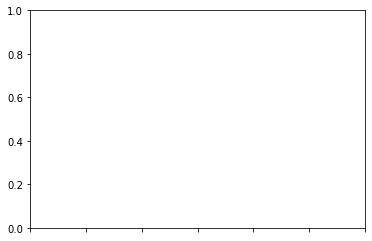

In [8]:

# List of Dash styles, each as integers in the format: (first line length, first space length, second line length, second space length...)

# set up the axes to look nice:
frame1 = plt.gca() 
frame1.axes.xaxis.set_ticklabels([]) # hide x axis numbers
plt.xlim(0,6) # set x and y axis extents
plt.ylim(-0.5,len(dashList)-0.5)
plt.ylabel("dashList element") # add a label to the y axis

for n in range(0,len(dashList)):
    plt.plot([0.5,4],[n,n], color = 'black', linestyle='--', dashes=dashList[n]) # plot a horizontal line using each custom line style
    # NB plot.plt draws a line between the following points: ([x0,x1],[y0,y1])
    plt.text(4.5,n,dashList[n]) # ...and show the numbers used to generate each custom linestyle
plt.show()

In [ ]:
dict_style['CO2_uitstoot']

In [ ]:
dict_nlen = {'CO2_uitstoot':'CO2 emissions','IMVB':'IRBC','groene obligaties':'green bonds','stemmen':'voting','mensenrechten':'human rights'}
list_en = ['CO2 emissions','IRBC','green bonds','voting','human rights']
#dict_style = {'CO2_uitstoot':'solid','IMVB':'dashed','groene obligaties':'dotted','stemmen':'dashdot'}
dict_style = {'CO2_uitstoot':(5,2),'IMVB':(2,5),'groene obligaties':(4,10),'stemmen':(3,3,2,2),'mensenrechten':(5,2,20,2)}
plt.figure(figsize=[20,12])
#for ind in ['CO2_uitstoot','IMVB','groene obligaties','stemmen','mensenrechten']:
for ind in ['CO2_uitstoot','IMVB','groene obligaties','stemmen','mensenrechten']:
    #plt.plot(['2016','2017','2018','2019','2020','2021'],dfm.loc[ind,[2016,2017,2018,2019,2020,2021]].values,label=dict_nlen[ind],linewidth=4,linestyle=dict_style[ind])
    plt.plot(['2016','2017','2018','2019','2020','2021'],dfm.loc[ind,[2016,2017,2018,2019,2020,2021]].values,linestyle='--',dashes=dict_style[ind],color='black',label=dict_nlen[ind],linewidth=3)
plt.legend(fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Number of pension funds',fontsize=18)
plt.yticks(fontsize=16)
plt.show()
plt.close()

In [ ]:
dict_nlen = {'CO2_uitstoot':'CO2 emissions','IMVB':'IRBC','groene obligaties':'green bonds','stemmen':'voting','mensenrechten':'human rights'}
list_en = ['CO2 emissions','IRBC','green bonds','voting','human rights']
#dict_style = {'CO2_uitstoot':'solid','IMVB':'dashed','groene obligaties':'dotted','stemmen':'dashdot'}
dict_style = {'CO2_uitstoot':'k-','IMVB':'k--','groene obligaties':'k-.','stemmen':'k:','mensenrechten':'k.'}
plt.figure(figsize=[20,12])
dict_names = {...}
#for ind in ['CO2_uitstoot','IMVB','groene obligaties','stemmen','mensenrechten']:
for ind in ['CO2_uitstoot','IMVB','groene obligaties','stemmen']:#,'mensenrechten']:
    #plt.plot(['2016','2017','2018','2019','2020','2021'],dfm.loc[ind,[2016,2017,2018,2019,2020,2021]].values,label=dict_nlen[ind],linewidth=4,linestyle=dict_style[ind])
    plt.plot(['2016','2017','2018','2019','2020','2021'],dfm.loc[ind,[2016,2017,2018,2019,2020,2021]].values,dict_style[ind],label=dict_nlen[ind],linewidth=3)
plt.legend(fontsize=20)
plt.xlabel('Year',fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel('Number of pension funds',fontsize=24)
plt.yticks(fontsize=20)
plt.show()
plt.close()

In [ ]:
#GRAPH DIRK

new_labels = {2:'CO2_uitstoot',4:'klimaat',9:'esg integratie',16:'esg risico management',30:'groene obligaties'}
# #Calculate number of pension funds that report on selection of topics in certain year
dfm = pd.DataFrame(columns=list(df['dc:coverage'].unique()))
for topic in new_labels.keys():
    for year in df['dc:coverage'].unique():
        dfm.loc[new_labels[topic],year] = len(df[(df['dc:coverage']==year)&(df['topic_number']==topic)]['dc:creator'].unique())

dict_nlen = {'CO2_uitstoot':'CO2 emissions','groene obligaties':'green bonds','klimaat':'climate','esg risico management':'ESG risk management','esg integratie':'ESG integration'}
list_en = ['CO2 emissions','climate','green bonds','ESG risk management','ESG integration']
plt.figure(figsize=[20,12])
dict_names = {...}
for ind in ['CO2_uitstoot','klimaat','groene obligaties','esg risico management','esg integratie']:
    plt.plot(['2016','2017','2018','2019','2020','2021'],dfm.loc[ind,[2016,2017,2018,2019,2020,2021]].values,label=dict_nlen[ind],linewidth=4)
plt.legend(fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Number of pension funds',fontsize=18)
plt.yticks(fontsize=16)
plt.show()
plt.close()

In [ ]:
dfm

In [ ]:
#topic_model = BERTopic.load(MODEL_PATH + "bertopic_model_mvb_reducedtopics_new",embedding_model="paraphrase-multilingual-MiniLM-L12-v2")
#topic_model.get_topic_info()

### OLD

In [ ]:
# #Create dataframe with occurence topics for every document
# dfr = pd.DataFrame(columns=list(topic_model.get_topic_info()['Topic']))
# for doc in df['dc:source'].unique():
#     temp = df[df['dc:source']==doc]
#     pf = temp['dc:creator'].iloc[0]
#     year = temp['dc:coverage'].iloc[0]
#     dict_topics = temp.groupby(by=['topic_number'])['topic_number'].count().to_dict()
#     for topic in dict_topics.keys():
#         dfr.loc[pf+'_'+str(year),topic] = dict_topics[topic]        

In [ ]:
# #Create dictionary with occurence topic for every pension fund and every year
# dft = {}
# for topic in list(topic_model.get_topic_info()['Topic']):
#     dft[topic] = pd.DataFrame(columns=list(df['dc:coverage'].unique()))
#     for doc in df['dc:source'].unique():
#         temp = df[(df['dc:source']==doc)&(df['topic_number']==topic)]
#         if len(temp)>0:
#             pf = temp['dc:creator'].iloc[0]
#             year = temp['dc:coverage'].iloc[0]
#             dft[topic].loc[pf,year] = len(temp)

In [ ]:
# #Calculate number of pension funds that report on topic in certain year
# dfm = pd.DataFrame(columns=list(df['dc:coverage'].unique()))
# for topic in dft.keys():
#     for year in df['dc:coverage'].unique():
#         dfm.loc[topic,year] = dft[topic][year].count()    

In [ ]:
# relevant_topics = [0,1,3,7,10,13,14,17,20,21,24]
# new_labels = {0:'exclusions',1:'UNPRI',3:'CO2 emissions',7:'SDGs',10:'IMVB',13:'GRESB',14:'ESG_risicomanagement',17:'ESG_risico_rendement',20:'engagement',21:'esg_integratie',24:'voting'}
# topic_model.set_topic_labels(new_labels)
# topic_model.get_topic_info().head()
# topic_model.save(MODEL_PATH + "bertopic_model_mvb3_reducedtopics_customlabels")

In [ ]:
# dfm = dfm.astype(int)
# dfmt = dfm[dfm.index.isin(list(new_labels.keys()))]

In [ ]:
# #Create dataframe with occurence topics for every document
# dfr = pd.DataFrame(columns=list(topic_model.get_topic_info()['Topic']))
# for doc in df['dc:source'].unique():
#     temp = df[df['dc:source']==doc]
#     pf = temp['dc:creator'].iloc[0]
#     year = temp['dc:coverage'].iloc[0]
#     dict_topics = temp.groupby(by=['topic_number'])['topic_number'].count().to_dict()
#     for topic in dict_topics.keys():
#         dfr.loc[pf+'_'+str(year),topic] = dict_topics[topic]        

In [ ]:
# #Create dataframe with amount of relevant topics present for every pension fund for every year
# dfa = pd.DataFrame()
# for pf in df['dc:creator'].unique():
#     for year in df['dc:coverage'].unique():
#         temp = df[(df['dc:creator']==pf)&(df['dc:coverage']==year)&(df['topic_number'].isin(relevant_topics))]
#         dfa.loc[pf,year] = len(temp['topic_number'].unique())

In [ ]:
#To do:
#most important topics for every year
#most important topics for every pension fund (all years or 1 year)

### Visualise results

In [ ]:
# visualize_barchart(topic_model,topics=[0,1,3,7,20,24],custom_labels=True, top_n_topics=6)

In [ ]:
# new_labels = {0:'uitsluitingen',1:'UNPRI',3:'CO2',7:'SDGs',10:'IMVB',13:'GRESB',14:'ESG_risicomanagement',17:'ESG_risico_rendement',20:'engagement_dialoog',21:'esg_integratie',24:'engagement_stembeleid'}
# topic_model.set_topic_labels(new_labels)

In [ ]:
# #topic_model.visualize_topics()
# #topic_model.visualize_heatmap()
# topic_model.visualize_barchart(topics=[0,1,3,7,17,20,21,24])

# temp = dfmt.loc[[0,1,3,7,20,24],:]
# plt.figure(figsize=[10,7])
# for ind in temp.index:
#     plt.plot(['2016','2017','2018','2019','2020'],temp.loc[ind,[2016,2017,2018,2019,2020]].values,label=new_labels[ind])
# plt.legend()
# plt.xlabel('Year')
# plt.ylabel('Number of pension funds')
# plt.title('Most important topics over time')
# plt.show()
# plt.close()

### Save results to excel

In [ ]:
# writer = pd.ExcelWriter(OUTPUT_DATA_PATH + "output_BERTopic.xlsx",engine='xlsxwriter')
# topic_model.get_topic_info().to_excel(writer,sheet_name='topic_info')
# dfr.to_excel(writer,sheet_name='document_topics')
# dfa.to_excel(writer,sheet_name='pf_year')
# dfm.to_excel(writer,sheet_name='topics_year')
# for topic in dft.keys():
#     dft[topic].to_excel(writer,sheet_name=str(topic))
# writer.save()

In [ ]:
#Save results to output

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


def plot_linestyles(ax, linestyles, title):
    X, Y = np.linspace(0, 100, 10), np.zeros(10)
    yticklabels = []

    for i, (name, linestyle) in enumerate(linestyles):
        ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')
        yticklabels.append(name)

    ax.set_title(title)
    ax.set(ylim=(-0.5, len(linestyles)-0.5),
           yticks=np.arange(len(linestyles)),
           yticklabels=yticklabels)
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    ax.spines[:].set_visible(False)

    # For each line style, add a text annotation with a small offset from
    # the reference point (0 in Axes coords, y tick value in Data coords).
    for i, (name, linestyle) in enumerate(linestyles):
        ax.annotate(repr(linestyle),
                    xy=(0.0, i), xycoords=ax.get_yaxis_transform(),
                    xytext=(-6, -12), textcoords='offset points',
                    color="blue", fontsize=8, ha="right", family="monospace")


fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 3])

plot_linestyles(ax0, linestyle_str[::-1], title='Named linestyles')
plot_linestyles(ax1, linestyle_tuple[::-1], title='Parametrized linestyles')

plt.tight_layout()
plt.show()